<a href="https://colab.research.google.com/github/ruturaj0626/DeepLearning/blob/main/Petro_Tuning_the_Deep_Learning_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Load up all the common functions. Required to execute other experiments
#Please reload if changes are made to the functions
%run Petro.BaseFit.ipynb

## 2.2 Epoch and Batch Sizes

In [21]:
#Initialize the measures
accuracy_measures = {}

for batch_size in range(16,128,16):
    
    #Load default configuration
    model_config = base_model_config()
    #Acquire and process input data
    X,Y = get_data()
    
    #set epoch to 20
    model_config["EPOCHS"]=20
    #Set batch size to experiment value
    model_config["BATCH_SIZE"] = batch_size
    model_name = "Batch-Size-" + str(batch_size)
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]



******************************************************
Model: "Batch-Size-16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Batch-Size-32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)         

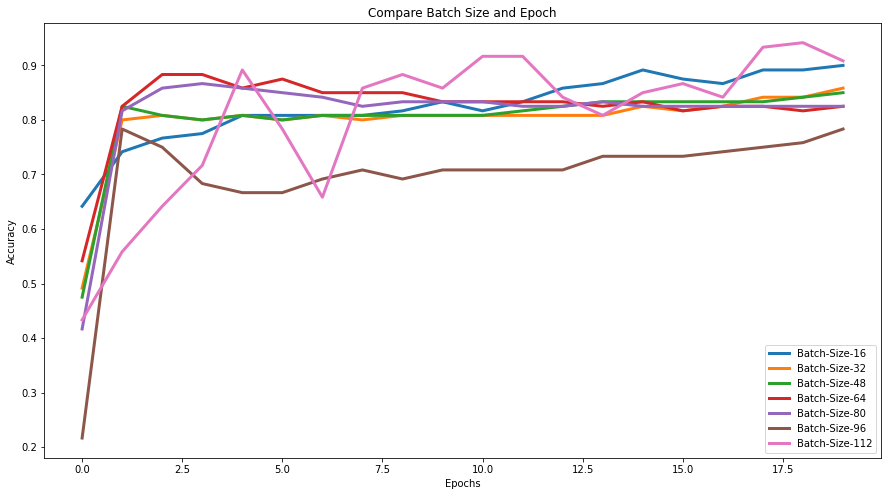

In [22]:
plot_graph(accuracy_measures, "Compare Batch Size and Epoch")

## 2.3. Layers in a Network

In [23]:
accuracy_measures = {}
layer_list =[]
for layer_count in range(1,6):
    
    #32 nodes in each layer
    layer_list.append(32)
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Layers-" + str(layer_count)
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]




******************************************************
Model: "Layers-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Output-Layer (Dense)        (None, 3)                 99        
                                                                 
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Layers-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 32)                1056   

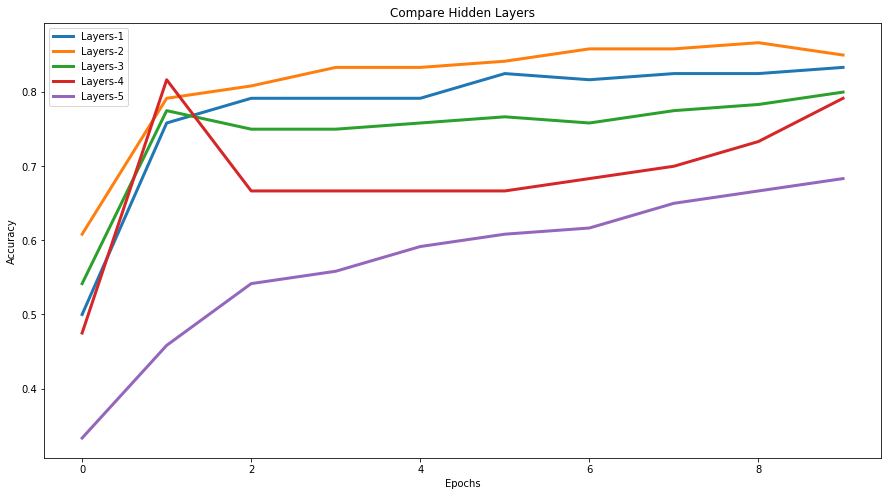

In [24]:
plot_graph(accuracy_measures, "Compare Hidden Layers")

## 2.4 Nodes in a Layer

In [25]:
accuracy_measures = {}

for node_count in range(8,40,8):
    
    #have 2 hidden layers in the networks
    layer_list =[]
    for layer_count in range(2):
        layer_list.append(node_count)
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Nodes-" + str(node_count)
    history=create_and_run_model(model_config,X,Y, model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]



******************************************************
Model: "Nodes-8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 8)                 40        
                                                                 
 Dense-Layer-1 (Dense)       (None, 8)                 72        
                                                                 
 Output-Layer (Dense)        (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Nodes-16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 16)                80      

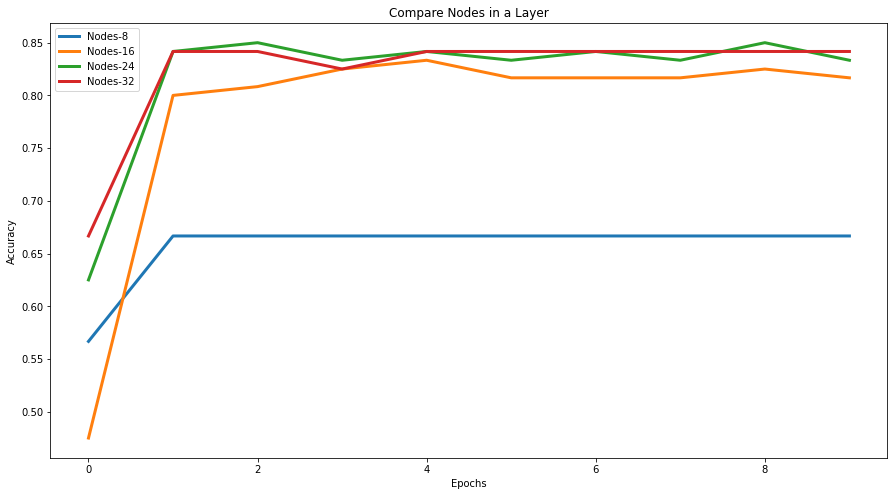

In [26]:

plot_graph(accuracy_measures, "Compare Nodes in a Layer")

## 2.5 Choosing Activation Functions

In [27]:
accuracy_measures = {}

activation_list = ['relu','sigmoid','tanh']

for activation in activation_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["HIDDEN_ACTIVATION"] = activation
    model_name = "Model-" + activation
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures["Model-" + activation] = history.history["accuracy"]



******************************************************
Model: "Model-relu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Model-sigmoid"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)            

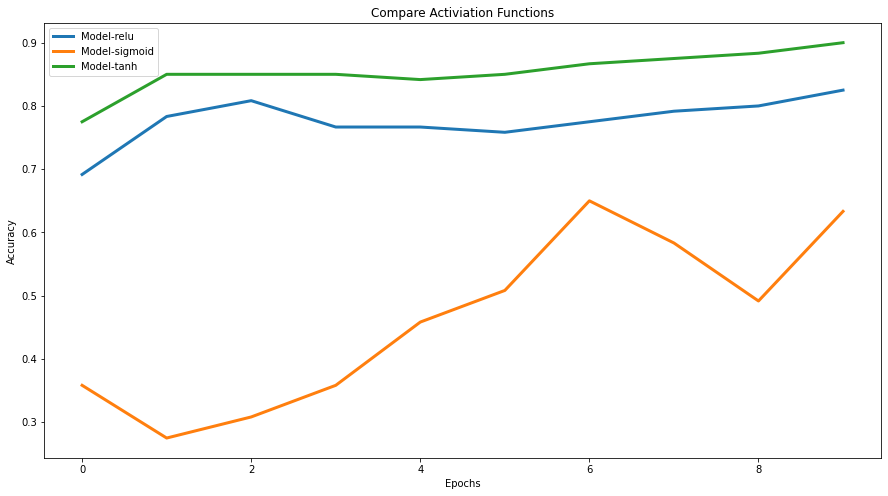

In [28]:

plot_graph(accuracy_measures, "Compare Activiation Functions")

## 2.6. Weights Initialization

In [29]:
accuracy_measures = {}

initializer_list = ['random_normal','zeros','ones',"random_uniform"]
for initializer in initializer_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["WEIGHTS_INITIALIZER"] = initializer
    model_name = "Model-" + initializer
    history=create_and_run_model(model_config,X,Y, model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]





******************************************************
Model: "Model-random_normal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Model-zeros"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)     

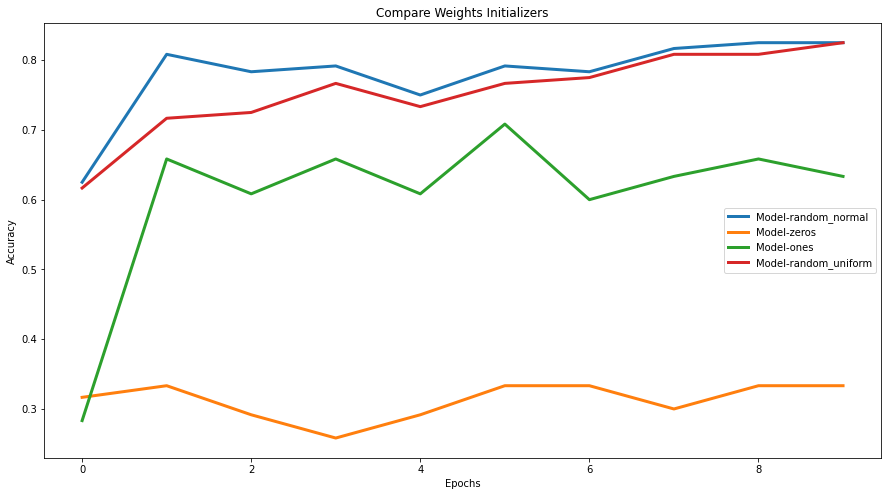

In [30]:
plot_graph(accuracy_measures, "Compare Weights Initializers")

#Tuning Back Propagation

In [31]:
accuracy_measures = {}

normalization_list = ['none','batch']
for normalization in normalization_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["NORMALIZATION"] = normalization
    model_name="Normalization-" + normalization
    history=create_and_run_model(model_config,X,Y,model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]


******************************************************
Model: "Normalization-none"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Normalization-batch"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 3

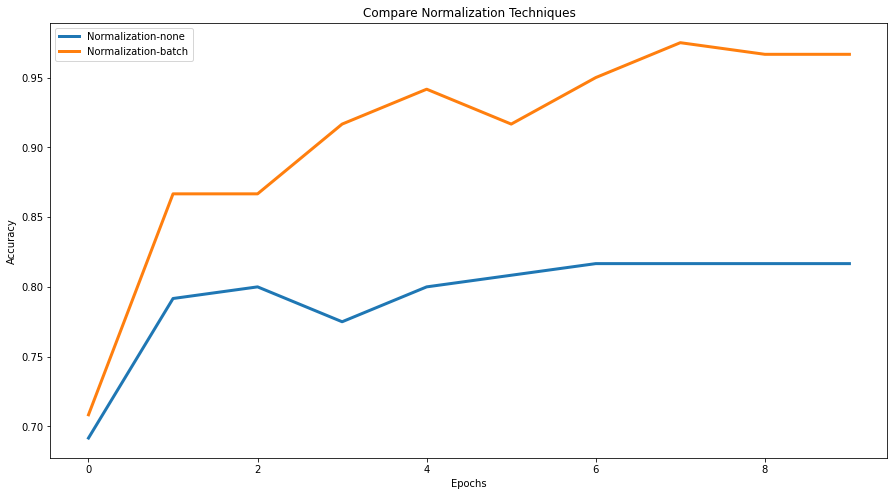

In [32]:
plot_graph(accuracy_measures, "Compare Normalization Techniques")

## 3.4 Optimizers

In [33]:

accuracy_measures = {}

optimizer_list = ['sgd','rmsprop','adam','adagrad']
for optimizer in optimizer_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["OPTIMIZER"] = optimizer
    model_name = "Optimizer-" + optimizer
    history=create_and_run_model(model_config,X,Y, model_name)
    
    accuracy_measures[model_name] = history.history["accuracy"]


******************************************************
Model: "Optimizer-sgd"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Optimizer-rmsprop"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)     

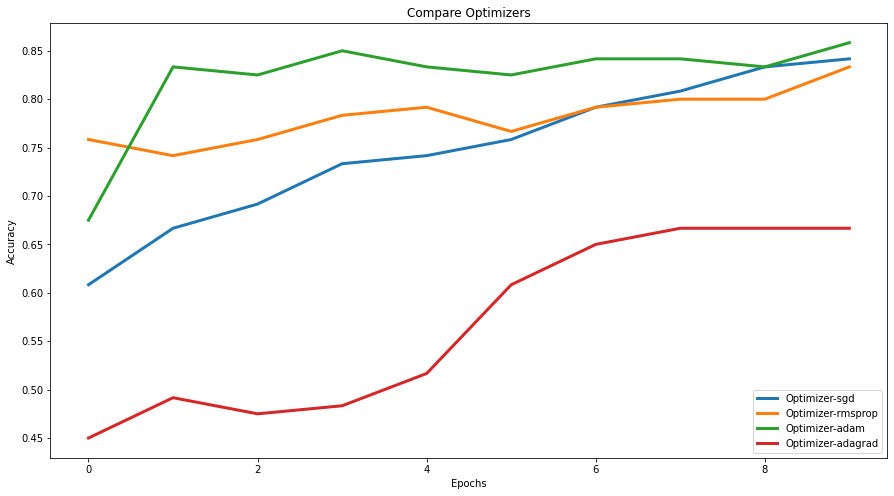

In [34]:
plot_graph(accuracy_measures, "Compare Optimizers")

## 3.6. Learning Rates

In [35]:
accuracy_measures = {}

learning_rate_list = [0.001, 0.005,0.01,0.1,0.5]
for learning_rate in learning_rate_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["LEARNING_RATE"] = learning_rate
    model_name="Learning-Rate-" + str(learning_rate)
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #accuracy
    accuracy_measures[model_name] = history.history["accuracy"]


******************************************************
Model: "Learning-Rate-0.001"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Learning-Rate-0.005"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 

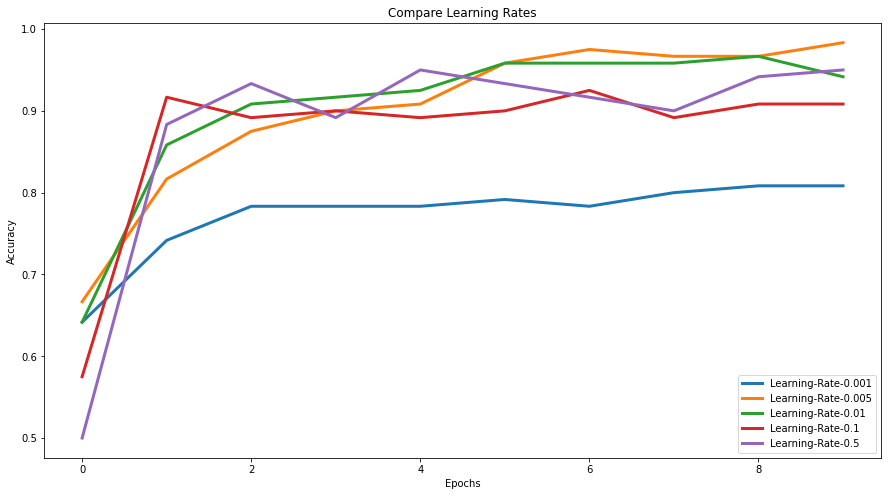

In [36]:
plot_graph(accuracy_measures, "Compare Learning Rates")

#Overfitting Management

In [37]:
accuracy_measures = {}

regularizer_list = ['l1','l2','l1_l2']
for regularizer in regularizer_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["REGULARIZER"] = regularizer
    model_config["EPOCHS"]=25
    model_name = "Regularizer-" + regularizer
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #Switch to validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]


******************************************************
Model: "Regularizer-l1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Regularizer-l2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)       

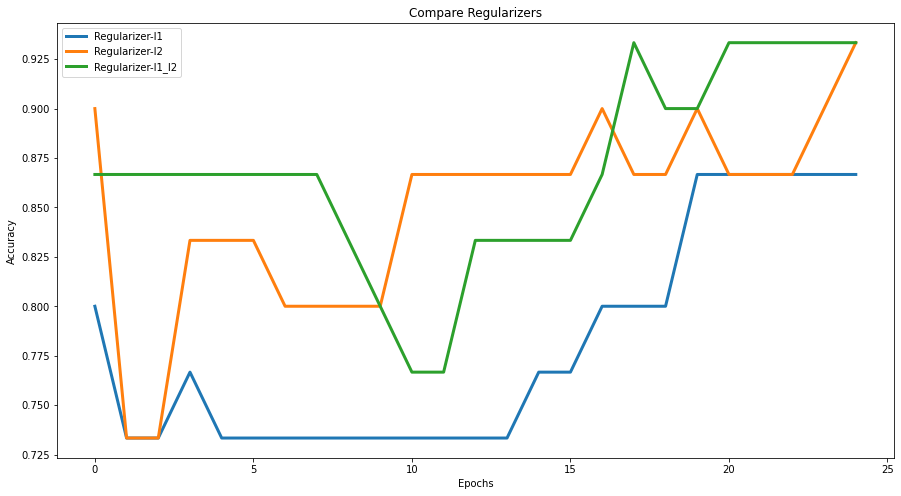

In [38]:
plot_graph(accuracy_measures, "Compare Regularizers")

## 4.5. Dropout

In [39]:
accuracy_measures = {}

dropout_list = [0.0, 0.1, 0.2, 0.5]
for dropout in dropout_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["DROPOUT_RATE"] = dropout
    model_config["EPOCHS"]=25
    model_name="Dropout-" + str(dropout)
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #Using validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]


******************************************************
Model: "Dropout-0.0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                160       
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Dropout-0.1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)             

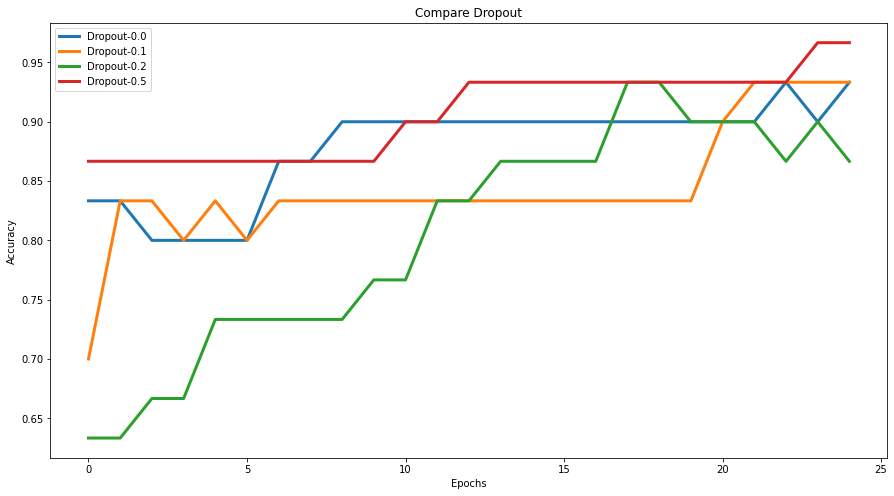

In [40]:
plot_graph(accuracy_measures, "Compare Dropout")